In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\vchan\OneDrive\Desktop\45-days-of-ml\datasets\loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Loan Status Distribution

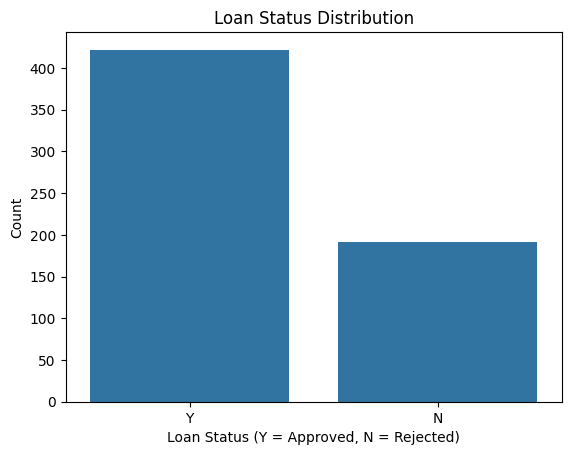

In [5]:
sns.countplot(x='Loan_Status', data=df)
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status (Y = Approved, N = Rejected)")
plt.ylabel("Count")
plt.show()


In [6]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

## Credit_History vs Loan_Status (THE MOST DANGEROUS FEATURE)

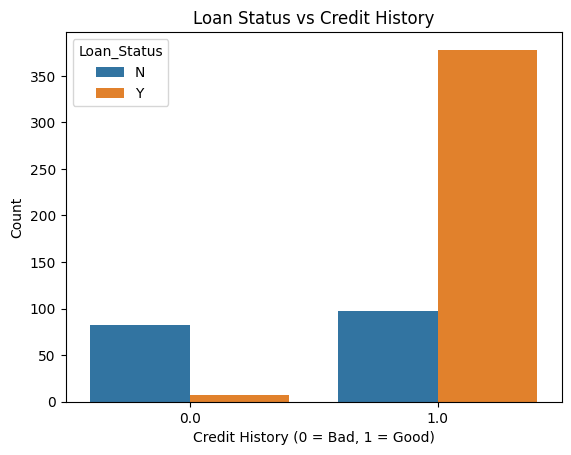

In [9]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.title("Loan Status vs Credit History")
plt.xlabel("Credit History (0 = Bad, 1 = Good)")
plt.ylabel("Count")
plt.show()

#### Explainations
1️. What the plot usually shows
For Credit_History = 1 → mostly Approved
For Credit_History = 0 → mostly Rejected
This separation is very strong.

2. Why accuracy will lie here
Because:
Model relies almost entirely on Credit_History
Other features become irrelevant
Accuracy looks high
Model fails if:
    - Credit policy changes
    - New customers have limited credit history
    - Economic conditions change

## ApplicantIncome vs Loan_Status

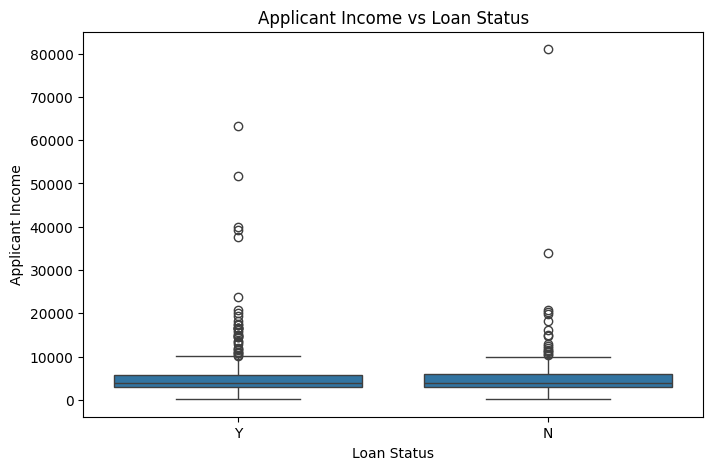

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title("Applicant Income vs Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Applicant Income")
plt.show()


#### Explaination
1. What does ONE box mean?
- Each box summarizes hundreds of people.
-- Inside a box:

a. Middle line → median income (50% earn less, 50% earn more)

b. Box height → where the middle 50% of people lie

c. Whiskers → “normal” range

d. Dots outside → outliers (very high incomes)


2. What about the dots (outliers)?
You see:
- High-income people in Y
- High-income people in N

Meaning:
Even people earning a lot get rejected and people earning modest amounts get approved.

#### This destroys the naive belief:
- “High income = loan approved”

## Property_Area vs Loan_Status

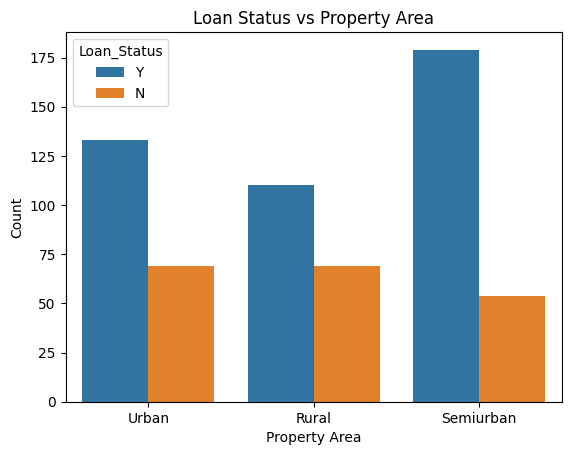

In [12]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.title("Loan Status vs Property Area")
plt.xlabel("Property Area")
plt.ylabel("Count")
plt.show()

#### Explaination
Categorical features can encode historical bias even when they appear predictive.
Ask yourself:
- Does living in a semiurban area cause better repayment?
- Probably no.

If future data changes:
- New rural development
- Policy shift
- Digital banking growth

The model:
- Still penalizes rural applicants
- Makes outdated decisions
- Appears accurate but is wrong

## Finding Missing Values

In [14]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#### Explaination
Blind filling:
- removes information
- injects false certainty